In [31]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import os, sys, h5py, json
from importlib import reload

sys.path.append('C:/Users/richy/OneDrive/Bureau/prog/jupyternb/')

import fidle.pwk as pwk

In [32]:
vocab_size = 10000
hide_most_frequently = 0

review_len = 256
dense_vector_size = 16

epochs = 30
batch_size = 512

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size, skip_top=hide_most_frequently, seed=42,)

In [34]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [35]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {w:(i+3) for w,i in word_index.items()}
word_index.update({'<pad>':0, '<start>':1, '<unknown>':2, '<undef>':3,})

index_word = {index:word for word,index in word_index.items()}

def dataset2text(review):
    return ' '.join([index_word.get(i, '?') for i in review])

In [36]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, value=0, padding='post', maxlen=review_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, value=0, padding='post', maxlen=review_len)
x_train[11]

array([   1,  608,   60,   48,   25,  191,  759,    2,   14,   20,    9,
        371,  642,    4,  139,   19,  308, 7089,   97,   56,   18,    2,
         31,    7,    4,  283,  731,  212, 2239,   39,    4, 3646, 1117,
       5934, 2567,  166,  112, 1819,    5, 9123,  168, 1036,    5, 1139,
          5,   12,    9, 1543,  253,    8,  106,    4,   31, 2433,   26,
          4,  118,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [39]:
def get_model(vocab_size=10000, dense_vector_size=32, review_len=256):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(review_len,)))
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=dense_vector_size, input_length=review_len))
    model.add(keras.layers.GlobalAveragePooling1D())
    model.add(keras.layers.Dense(dense_vector_size, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
              
model=get_model(vocab_size, dense_vector_size, review_len)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/30
49/49 [==============================] - 1s 17ms/step - loss: 0.6906 - accuracy: 0.5858 - val_loss: 0.6858 - val_accuracy: 0.7149
Epoch 2/30
49/49 [==============================] - 1s 14ms/step - loss: 0.6748 - accuracy: 0.7463 - val_loss: 0.6616 - val_accuracy: 0.7334
Epoch 3/30
49/49 [==============================] - 1s 14ms/step - loss: 0.6362 - accuracy: 0.7762 - val_loss: 0.6130 - val_accuracy: 0.7779
Epoch 4/30
49/49 [==============================] - 1s 14ms/step - loss: 0.5730 - accuracy: 0.8100 - val_loss: 0.5469 - val_accuracy: 0.8126
Epoch 5/30
49/49 [==============================] - 1s 14ms/step - loss: 0.4988 - accuracy: 0.8372 - val_loss: 0.4810 - val_accuracy: 0.8329
Epoch 6/30
49/49 [==============================] - 1s 14ms/step - loss: 0.4309 - accuracy: 0.8594 - val_loss: 0.4262 - val_accuracy: 0.8452
Epoch 7/30
49/49 [==============================] - 1s 14ms/step - loss: 0.3773 - accuracy: 0.8732 - val_loss: 0.3868 - val_accuracy: 0.8544
Epoch 8/30
49

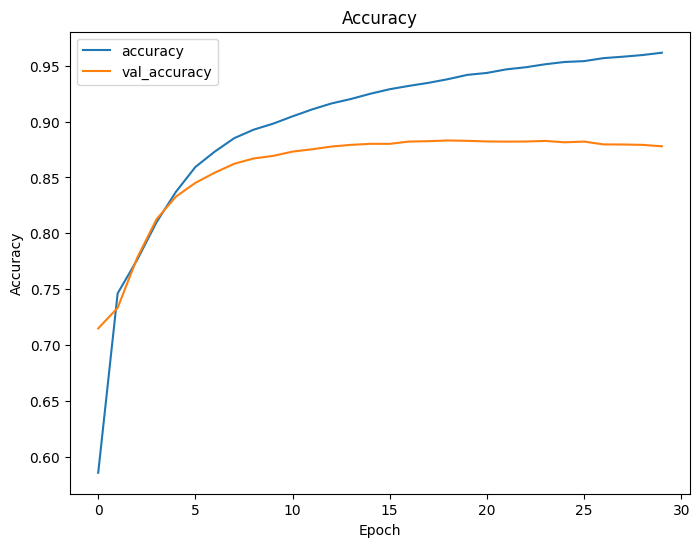

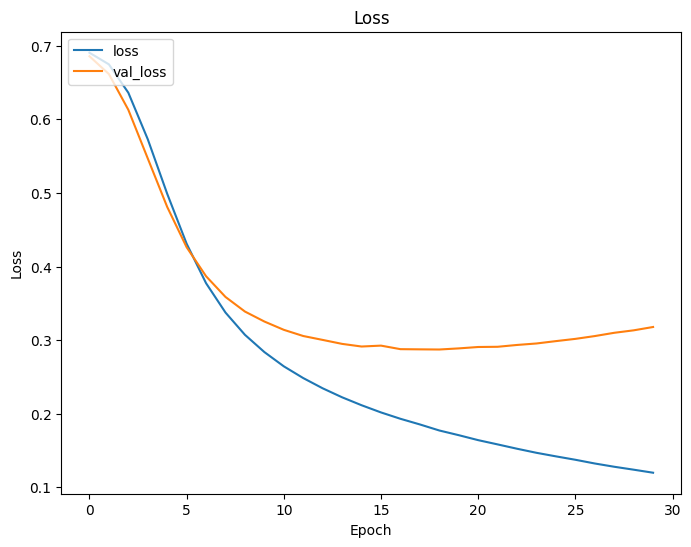

In [41]:
pwk.plot_history(history)

In [43]:
score = model.evaluate(x_test, y_test, verbose=1)
score

782/782 [==============================] - 1s 858us/step - loss: 0.3178 - accuracy: 0.8779


[0.3177783489227295, 0.8779199719429016]